In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
df = pd.read_csv('bank-full.csv')

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
df.shape

(45211, 17)

In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [32]:
df.job.unique().__len__()

12

In [33]:
df.balance.unique().__len__()

7168

In [34]:
df.age.unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88], dtype=int64)

In [11]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


In [35]:
features_na = [features for features in df.columns if df[features].isnull().sum()>0]
for feature in features_na:
    print(feature,np.round(df[feature].isnull().mean(), 4), '%missing values')
else:
    print("no missing value found")    

no missing value found


In [36]:
for column in df.columns:
    print(column,df[column].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
y 2


In [21]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [38]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['y']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [40]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4


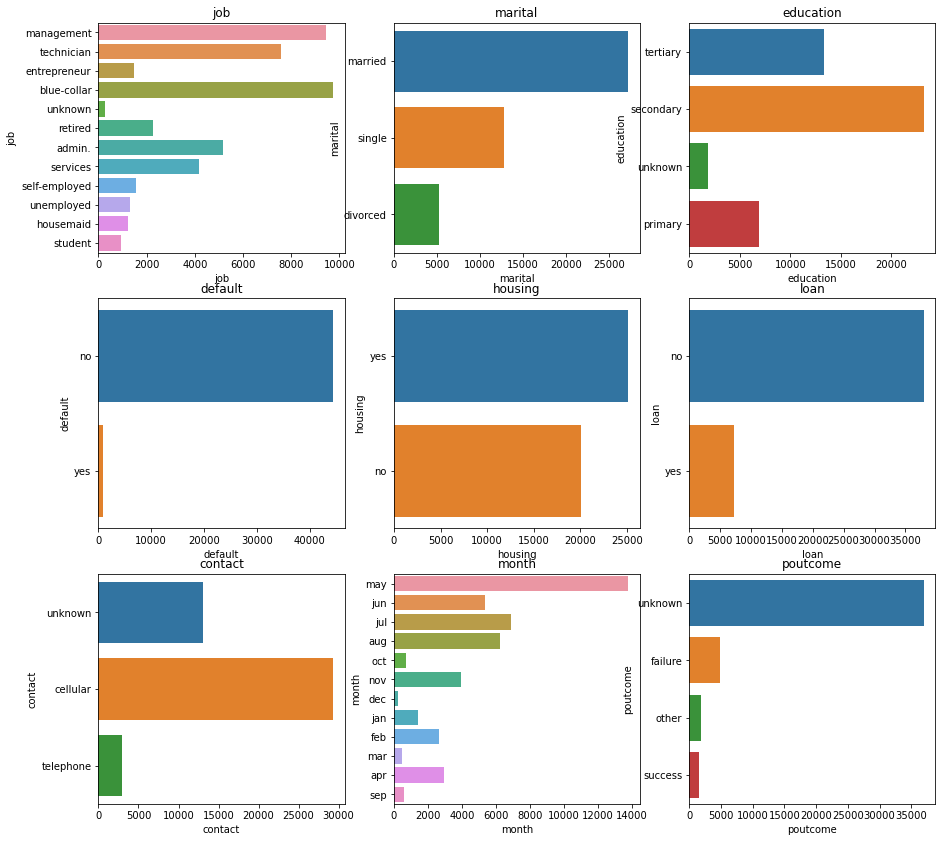

In [56]:
plt.figure(figsize=(15,60), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

In [44]:
df=df.rename(columns={'y':'deposit'})

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


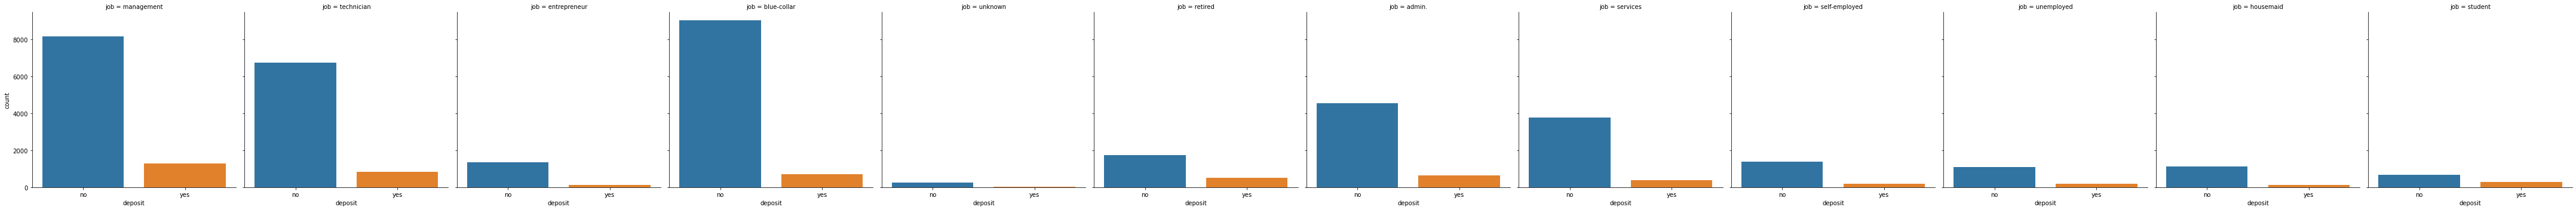

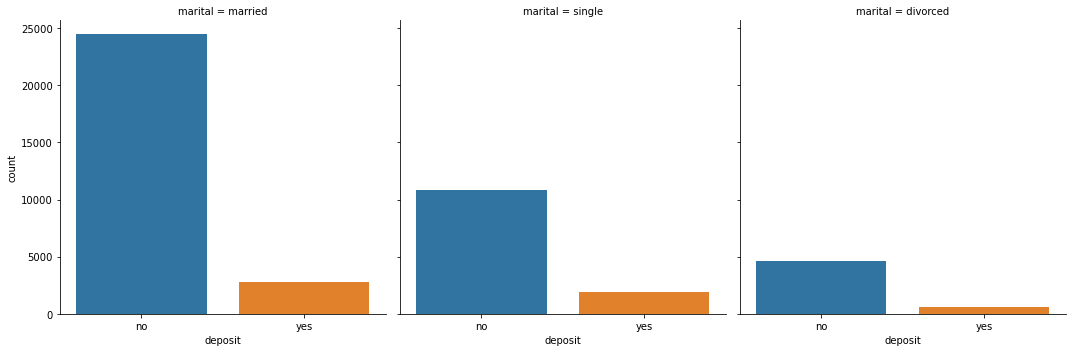

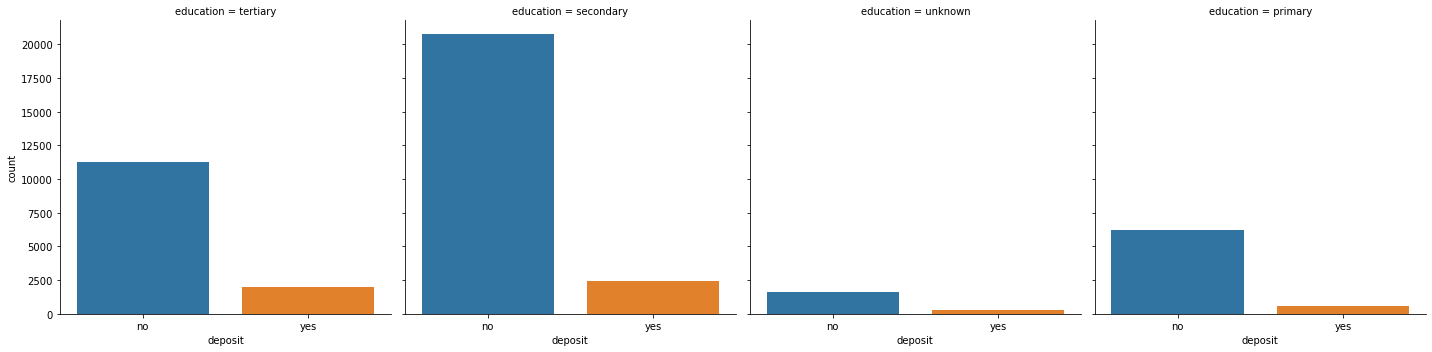

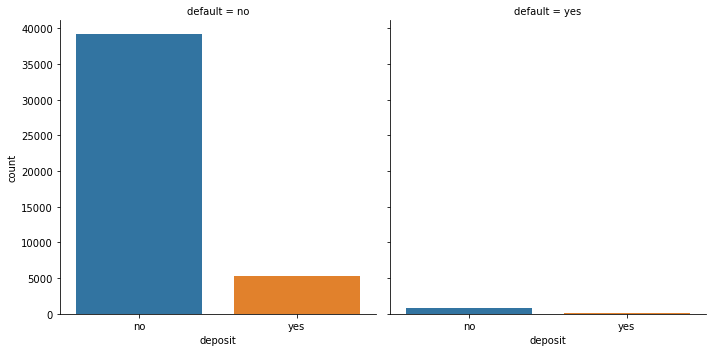

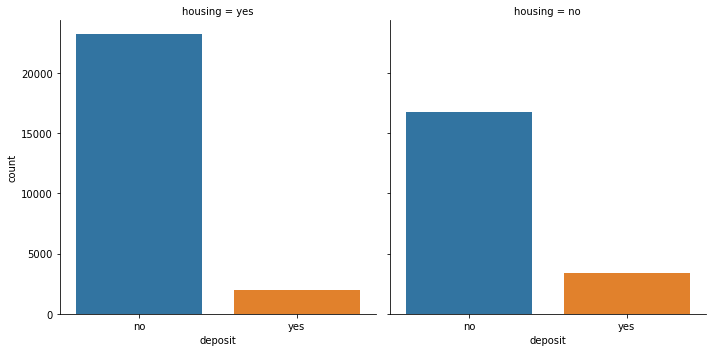

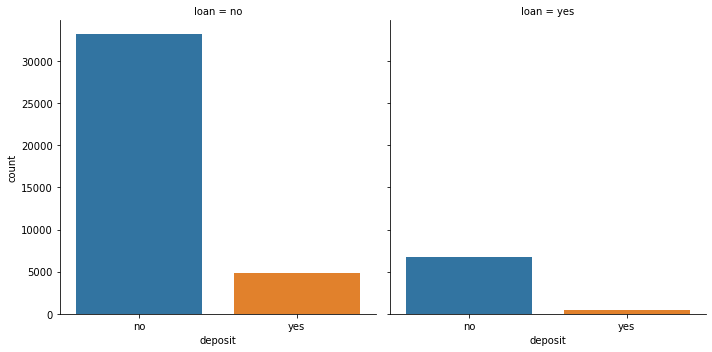

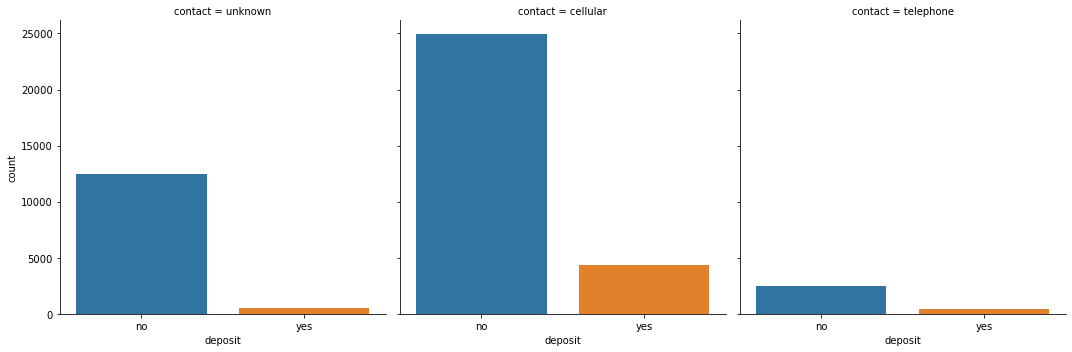

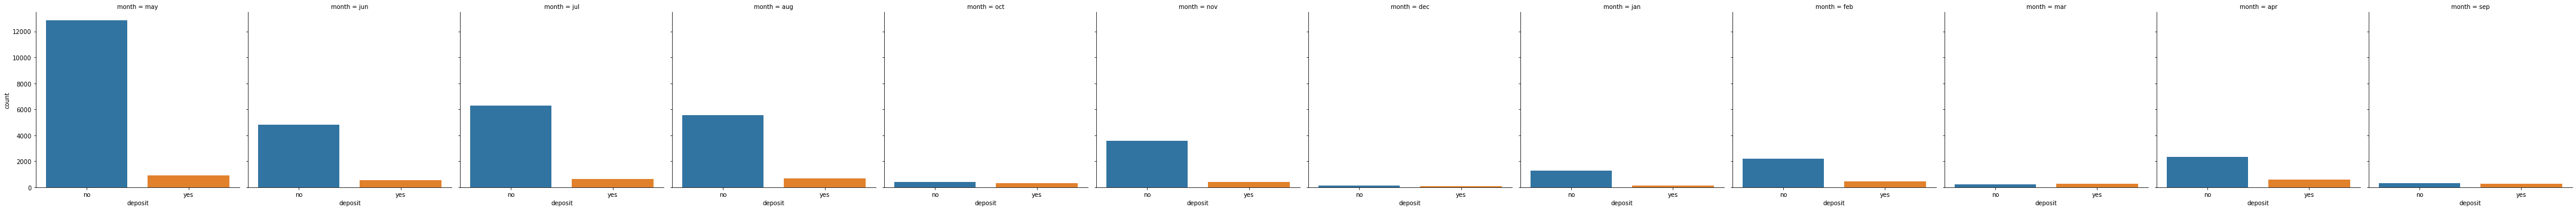

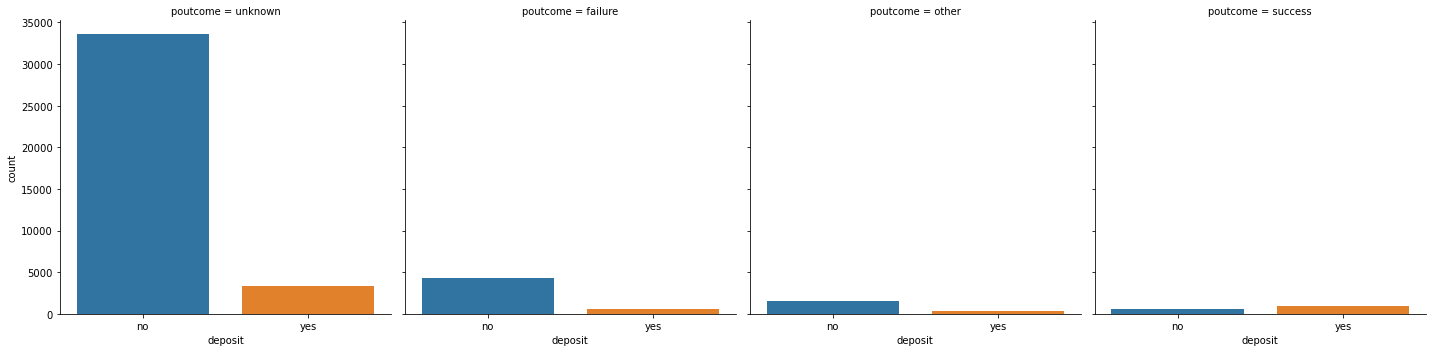

In [46]:
for categorical_feature in categorical_features:
    sns.catplot(x='deposit', col=categorical_feature, kind='count', data= df)
plt.show()

In [47]:
for categorical_feature in categorical_features:
    print(df.groupby(['deposit',categorical_feature]).size())

deposit  job          
no       admin.           4540
         blue-collar      9024
         entrepreneur     1364
         housemaid        1131
         management       8157
         retired          1748
         self-employed    1392
         services         3785
         student           669
         technician       6757
         unemployed       1101
         unknown           254
yes      admin.            631
         blue-collar       708
         entrepreneur      123
         housemaid         109
         management       1301
         retired           516
         self-employed     187
         services          369
         student           269
         technician        840
         unemployed        202
         unknown            34
dtype: int64
deposit  marital 
no       divorced     4585
         married     24459
         single      10878
yes      divorced      622
         married      2755
         single       1912
dtype: int64
deposit  education
no      

In [48]:
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['deposit']))]
print('Number of numerical variables: ', len(numerical_features))
df[numerical_features].head()

Number of numerical variables:  7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [49]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


In [50]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 7


C:\Users\GAGANA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\GAGANA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\GAGANA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

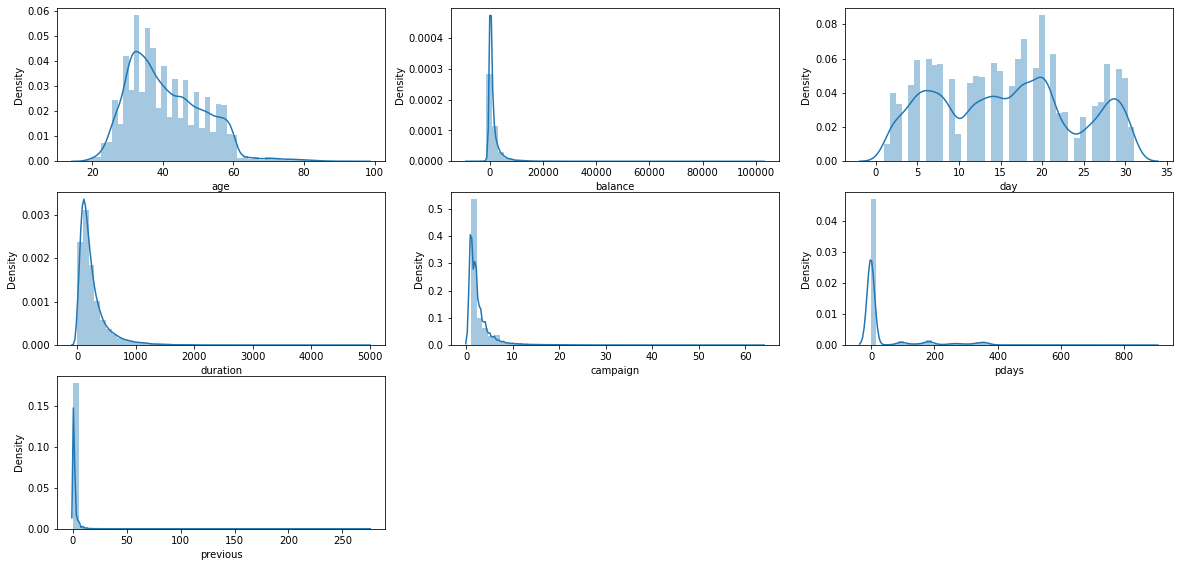

In [57]:
plt.figure(figsize=(20,40), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

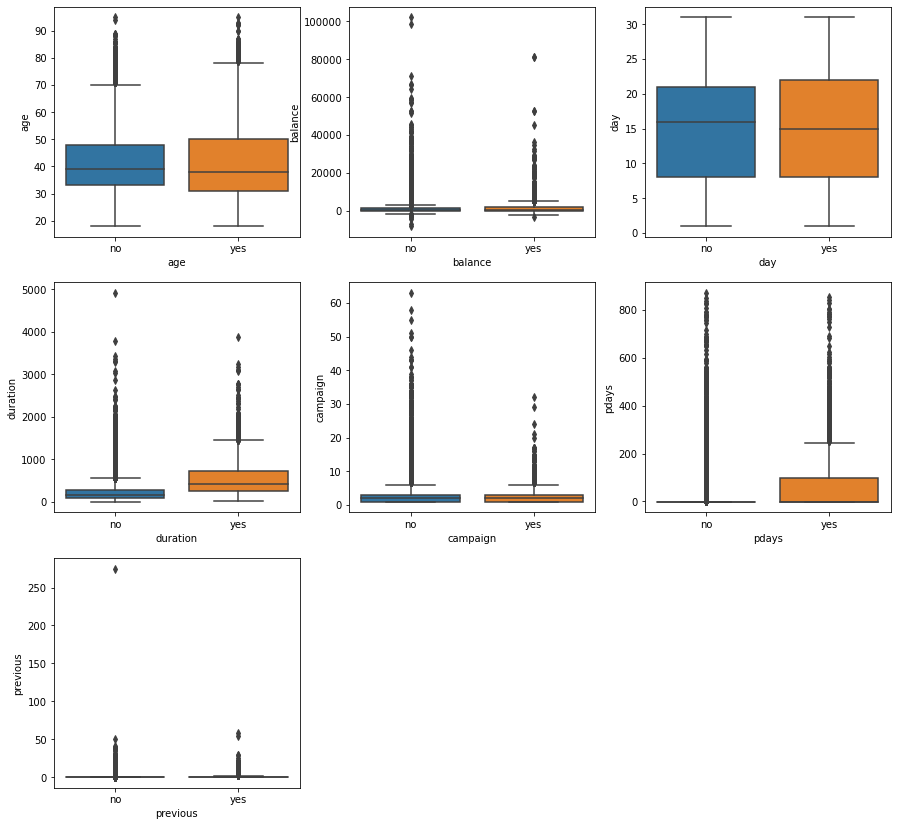

In [58]:
plt.figure(figsize=(15,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="deposit", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

C:\Users\GAGANA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\GAGANA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\GAGANA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\GAGANA\anaconda3\li

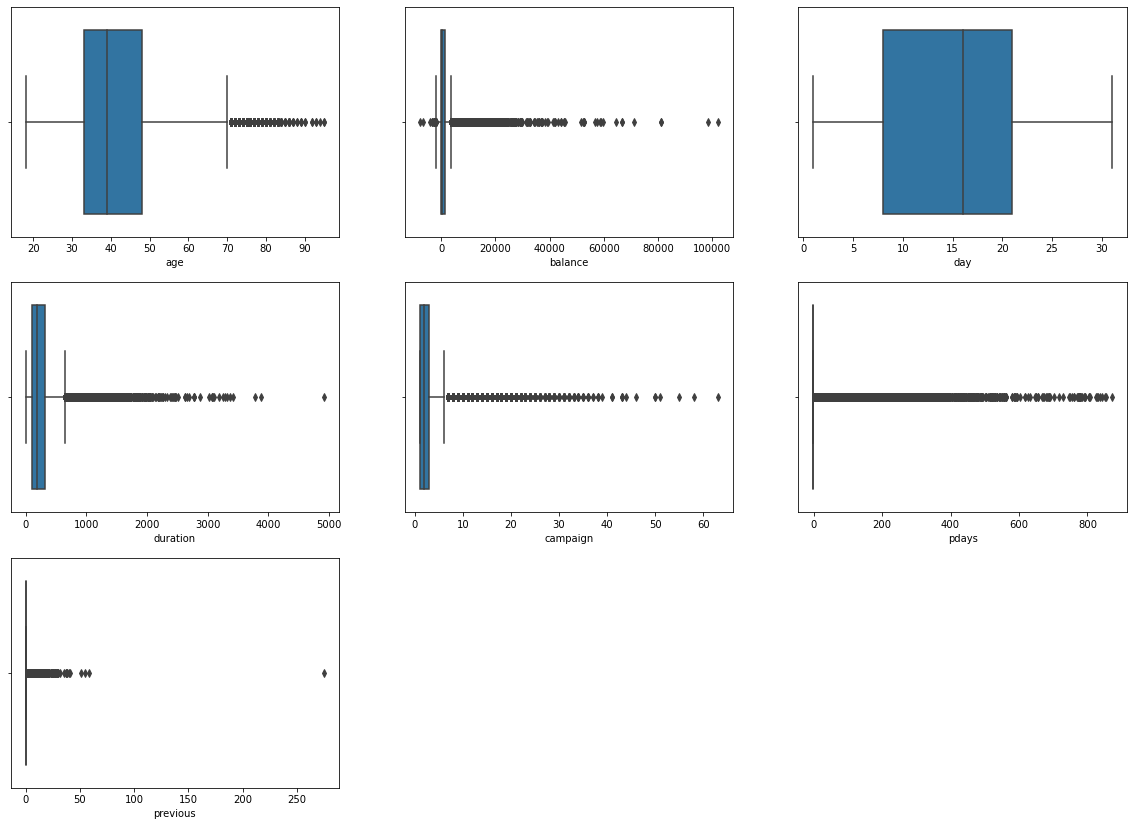

In [59]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

<AxesSubplot:>

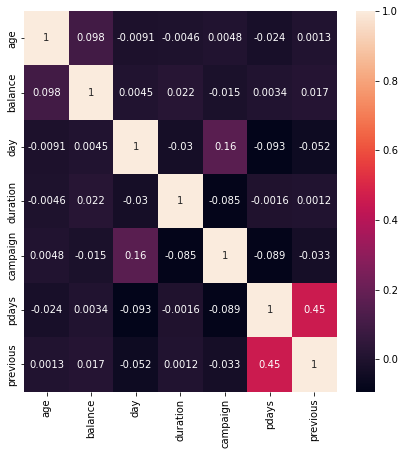

In [61]:
cor_mat=df.corr()
fig = plt.figure(figsize=(7,7))
sns.heatmap(cor_mat,annot=True)


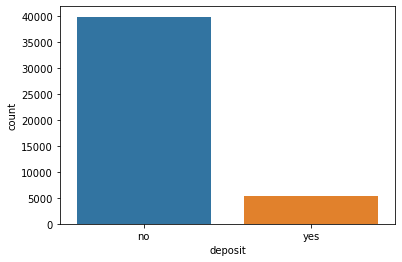

In [62]:
sns.countplot(x='deposit',data=df)
plt.show()

In [63]:
df['deposit'].groupby(df['deposit']).count()

deposit
no     39922
yes     5289
Name: deposit, dtype: int64

In [64]:
df2=df.copy()

In [65]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [66]:
df2.groupby(['deposit','default']).size()

deposit  default
no       no         39159
         yes          763
yes      no          5237
         yes           52
dtype: int64

In [67]:
df2.drop(['default'],axis=1, inplace=True)

In [68]:
df2.groupby(['deposit','pdays']).size()

deposit  pdays
no       -1       33570
          1           9
          2          35
          3           1
          4           1
                  ...  
yes       804         1
          805         1
          828         1
          842         1
          854         1
Length: 914, dtype: int64

In [69]:
df2.drop(['pdays'],axis=1, inplace=True)

In [70]:
df2.groupby('age',sort=True)['age'].count()

age
18     12
19     35
20     50
21     79
22    129
     ... 
90      2
92      2
93      2
94      1
95      2
Name: age, Length: 77, dtype: int64

In [71]:
df2.groupby(['deposit','balance'],sort=True)['balance'].count()

deposit  balance
no       -8019      1
         -6847      1
         -4057      1
         -3372      1
         -3313      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Name: balance, Length: 9258, dtype: int64

In [72]:
df2.groupby(['deposit','duration'],sort=True)['duration'].count()

deposit  duration
no       0            3
         1            2
         2            3
         3            4
         4           15
                     ..
yes      3094         1
         3102         1
         3183         1
         3253         1
         3881         1
Name: duration, Length: 2627, dtype: int64

In [73]:
df2.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           14983
         2           11104
         3            4903
         4            3205
         5            1625
                     ...  
yes      20              1
         21              1
         24              1
         29              1
         32              1
Name: campaign, Length: 70, dtype: int64

In [74]:
df3 = df2[df2['campaign'] < 33]

In [75]:
df3.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           14983
         2           11104
         3            4903
         4            3205
         5            1625
         6            1199
         7             688
         8             508
         9             306
         10            252
         11            185
         12            151
         13            127
         14             89
         15             80
         16             77
         17             63
         18             51
         19             44
         20             42
         21             34
         22             23
         23             22
         24             19
         25             22
         26             13
         27             10
         28             16
         29             15
         30              8
         31             12
         32              8
yes      1            2561
         2            1401
         3             618
         4             317
         5

In [76]:
df3.groupby(['deposit','previous'],sort=True)['previous'].count()

deposit  previous
no       0           33532
         1            2189
         2            1650
         3             848
         4             543
                     ...  
yes      26              1
         29              1
         30              1
         55              1
         58              1
Name: previous, Length: 66, dtype: int64

In [77]:
df4 = df3[df3['previous'] < 31]

In [78]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  cat_columns:
    df4 = pd.concat([df4.drop(col, axis=1),pd.get_dummies(df4[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [79]:
bool_columns = ['housing', 'loan', 'deposit']
for col in  bool_columns:
    df4[col+'_new']=df4[col].apply(lambda x : 1 if x == 'yes' else 0)
    df4.drop(col, axis=1, inplace=True)

In [80]:
df4.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,deposit_new
0,58,2143,5,261,1,0,0,0,0,1,...,1,0,0,0,0,0,1,1,0,0
1,44,29,5,151,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
2,33,2,5,76,1,0,0,1,0,0,...,1,0,0,0,0,0,1,1,1,0
3,47,1506,5,92,1,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
4,33,1,5,198,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [81]:
df4.head

<bound method NDFrame.head of        age  balance  day  duration  campaign  previous  job_blue-collar  \
0       58     2143    5       261         1         0                0   
1       44       29    5       151         1         0                0   
2       33        2    5        76         1         0                0   
3       47     1506    5        92         1         0                1   
4       33        1    5       198         1         0                0   
...    ...      ...  ...       ...       ...       ...              ...   
45206   51      825   17       977         3         0                0   
45207   71     1729   17       456         2         0                0   
45208   72     5715   17      1127         5         3                0   
45209   57      668   17       508         4         0                1   
45210   37     2971   17       361         2        11                0   

       job_entrepreneur  job_housemaid  job_management  ...  month_ma

In [ ]:
#Split Dataset into Training set and Test set

In [82]:
X = df4.drop(['deposit_new'],axis=1)
y = df4['deposit_new']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [83]:
len(X_train)

36128

In [86]:
len(X_test)

9033

In [87]:
pip install xgboost 

Note: you may need to restart the kernel to use updated packages.


In [88]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [89]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=RandomForestClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.90714088 0.90658732 0.90340437 0.9050519  0.90712803]
0.9058625015203653


In [90]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=RandomForestClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.90769444 0.90478826 0.89883753 0.90685121 0.9083737 ]
0.9053090291977164


In [91]:
model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [10, 50, 100, 130], 
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1), 
            'max_features': ['auto', 'log2']
        }
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
           'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}

In [92]:
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

In [93]:
model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=10,n_estimators=100)

In [94]:
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [95]:
model_xgb.score(X_test,y_test)

0.899147570021034

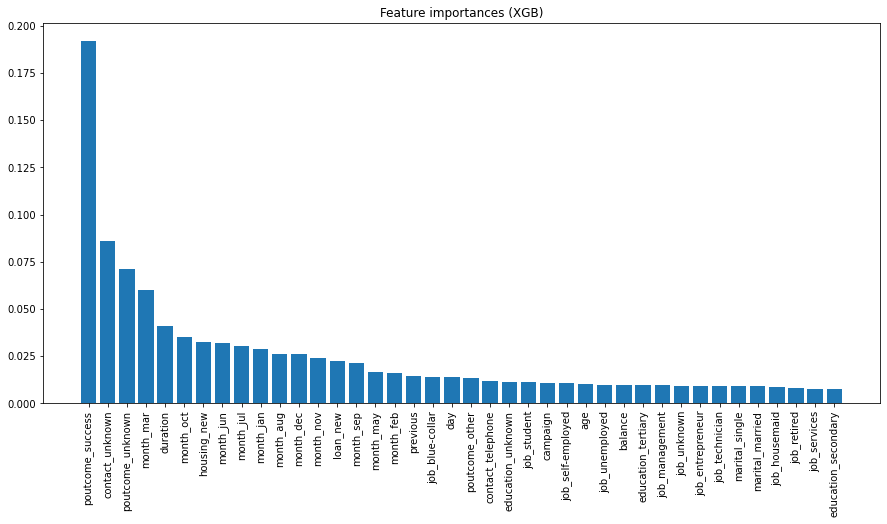

In [96]:
headers = ["name", "score"]
values = sorted(zip(X_train.columns, model_xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)


fig = plt.figure(figsize=(15,7))
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')

plt.show()

In [97]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model_xgb.predict(X_test))
cm

array([[7606,  344],
       [ 567,  516]], dtype=int64)

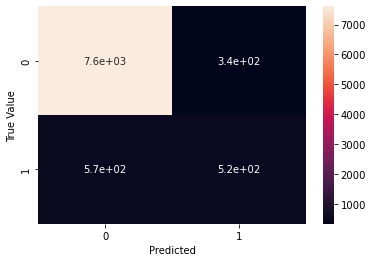

In [98]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()